In [1]:
# -- Description --
## MMIO 350 to 450 ppm

In [9]:
# Import Packages
import os
import pandas as pd
import numpy as np
#import Ngl
#import Nio
import xarray as xr
import netCDF4 as nc
import time
import pandas as pd
import csv

#plotting packages
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.util as cutil
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import geocat.datafiles as gdf
from geocat.viz import cmaps as gvcmaps
from geocat.viz import util as gvutil

In [2]:
# Set up color table 
# Readin Data should be in the following order

ColorDir = "/glade/work/pacosta/tools/scripts/python_bin/MioMIP/Scripts/"
filename='MidMIO_ModelColors.csv'
MidMioFile = pd.read_csv(filename, header=0, error_bad_lines=False, sep=',')
#MidMioFile

#Group by destination
Dest = MidMioFile.groupby("dest")
Dest400 = Dest.get_group(1)

In [3]:
# READ IN Data

DIR = '/glade/work/pacosta/tools/scripts/python_bin/MioMIP/Converted_data/final/'

CASE0 = xr.open_dataset(DIR+"CCSM3-MCO200ppm_Prange-1deg-monthlymean.nc") #0
CASE1 = xr.open_dataset(DIR+"CCSM3-MMG200ppm_Prange-1deg-monthlymean.nc") #1
CASE2 = xr.open_dataset(DIR+"CESM1-MMIO560ppm_Acosta-1deg-monthlymean.nc") #2
CASE3 = xr.open_dataset(DIR+"COSMOS_MMIO278ppm_Knorr-1deg-monthlymean.nc") #3
CASE4 = xr.open_dataset(DIR+"HadCM3L-MMIO_90SLE_280_Bradshaw-1deg-monthlymean.nc") #4
CASE5 = xr.open_dataset(DIR+"HadCM3L-MMIO_55SLE_280_Bradshaw-1deg-monthlymean.nc") #5
CASE6 = xr.open_dataset(DIR+"HadCM3L-MMIO_NOICE_280_Bradshaw-1deg-monthlymean.nc") #6
CASE7 = xr.open_dataset(DIR+"HadCM3L-LANG_280_Farnsworth-1deg-monthlymean.nc") #7

In [4]:
# Precipitation 

sec2day = (60.*60.*24.)
m2mm = 1000.

times = CASE7.time[:]
lats = CASE0.lat[:]
lons = CASE0.lon[:]

pr0 =  (CASE0.pr[:,:,:])*sec2day #mm/day 
pr1 =  (CASE1.pr[:,:,:])*sec2day #mm/year
pr2 =  (CASE2.pr[:,:,:])*sec2day #mm/year
pr3 =  (CASE3.pr[:,:,:])*sec2day #mm/year
pr4 =  (CASE4.pr[:,:,:])*sec2day #mm/year
pr5 =  (CASE5.pr[:,:,:])*sec2day #mm/year
pr6 =  (CASE6.pr[:,:,:])*sec2day #mm/year
pr7 =  (CASE7.pr[:,:,:])*sec2day #mm/year

prset = xr.Dataset(data_vars=dict(pr0=(['time','lat','lon'],pr0[:,:,:]),
                                  pr1=(['time','lat','lon'],pr1[:,:,:]),
                                  pr2=(['time','lat','lon'],pr2[:,:,:]),
                                  pr3=(['time','lat','lon'],pr3[:,:,:]),
                                  pr4=(['time','lat','lon'],pr4[:,:,:]),
                                  pr5=(['time','lat','lon'],pr5[:,:,:]),
                                  pr6=(['time','lat','lon'],pr6[:,:,:]),
                                  pr7=(['time','lat','lon'],pr7[:,:,:]),
                                  ),
                   coords=dict({'time': times, 'lat':lats, 'lon':lons}))
prary = prset.to_array()
prNEW0=prary.rename({'variable': 'exp'})
prNEW = prNEW0.mean(dim='exp', keep_attrs = True)

In [5]:
# Create NDJFM climotology

prnames = ('prNDJFM0','prNDJFM1','prNDJFM2','prNDJFM3','prNDJFM4','prNDJFM5','prNDJFM6','prNDJFM7')
prnames_lst = list(prnames)       #line above is a tuple and need to be converted into a list
prvars = (pr0,pr1,pr2,pr3,pr4,pr5,pr6,pr7)

#prNDJFM0 = xr.concat([pr0[0,:,:],pr0[1,:,:],pr0[2,:,:],pr0[10,:,:],pr0[11,:,:]],dim="time")
#prNDJFMmn0 = prNDJFM0.mean(dim='time', keep_attrs = True

for i in range(0,len(prnames_lst)):
    prnames_lst[i] = xr.concat([prvars[i][0,:,:],prvars[i][1,:,:],prvars[i][2,:,:],prvars[i][10,:,:],prvars[i][11,:,:]],dim="time")
    prnames_lst[i] = prnames_lst[i].mean(dim='time', keep_attrs = True)

#fm = np.array(prnames_lst)
#dfshape = np.reshape(prnames_lst,(8,181,360))
#dfshape
#df = pd.DataFrame(dfshape)
#prnames_lst
#prNDFJMary = prnames_lst.to_array()
np.shape(prnames_lst)

KeyboardInterrupt: 

In [6]:
pr0AS = xr.concat([pr0[0,:,:],pr0[1,:,:],pr0[2,:,:],pr0[10,:,:],pr0[11,:,:]],dim="time")
pr1AS = xr.concat([pr1[0,:,:],pr1[1,:,:],pr1[2,:,:],pr1[10,:,:],pr1[11,:,:]],dim="time")
pr2AS = xr.concat([pr2[0,:,:],pr2[1,:,:],pr2[2,:,:],pr2[10,:,:],pr2[11,:,:]],dim="time")
pr3AS = xr.concat([pr3[0,:,:],pr3[1,:,:],pr3[2,:,:],pr3[10,:,:],pr3[11,:,:]],dim="time")
pr4AS = xr.concat([pr4[0,:,:],pr4[1,:,:],pr4[2,:,:],pr4[10,:,:],pr4[11,:,:]],dim="time")
pr5AS = xr.concat([pr5[0,:,:],pr5[1,:,:],pr5[2,:,:],pr5[10,:,:],pr5[11,:,:]],dim="time")
pr6AS = xr.concat([pr6[0,:,:],pr6[1,:,:],pr6[2,:,:],pr6[10,:,:],pr6[11,:,:]],dim="time")
pr7AS = xr.concat([pr7[0,:,:],pr7[1,:,:],pr7[2,:,:],pr7[10,:,:],pr7[11,:,:]],dim="time")


prASset0 = xr.Dataset(data_vars=dict(pr0AS=(['time','lat','lon'],pr0AS[:,:,:]),
                                    pr1AS=(['time','lat','lon'],pr1AS[:,:,:]),
                                    pr2AS=(['time','lat','lon'],pr2AS[:,:,:]),
                                    pr3AS=(['time','lat','lon'],pr3AS[:,:,:]),
                                    pr4AS=(['time','lat','lon'],pr4AS[:,:,:]),
                                    pr5AS=(['time','lat','lon'],pr5AS[:,:,:]),
                                    pr6AS=(['time','lat','lon'],pr6AS[:,:,:]),
                                    pr7AS=(['time','lat','lon'],pr7AS[:,:,:]),
                                  ),
                   coords=dict({'lat':lats, 'lon':lons}))
prASary0 = prASset0.to_array()
prASNEW0=prASary0.rename({'variable': 'exp'})
prASNEW = prASNEW0.mean(dim='exp', keep_attrs = True)


pr0ASm = pr0AS.mean(dim='time', keep_attrs = True)
pr1ASm = pr1AS.mean(dim='time', keep_attrs = True)
pr2ASm = pr2AS.mean(dim='time', keep_attrs = True)
pr3ASm = pr3AS.mean(dim='time', keep_attrs = True)
pr4ASm = pr4AS.mean(dim='time', keep_attrs = True)
pr5ASm = pr5AS.mean(dim='time', keep_attrs = True)
pr6ASm = pr6AS.mean(dim='time', keep_attrs = True)
pr7ASm = pr7AS.mean(dim='time', keep_attrs = True)

prASset = xr.Dataset(data_vars=dict(pr0AS=(['lat','lon'],pr0ASm[:,:]),
                                    pr1AS=(['lat','lon'],pr1ASm[:,:]),
                                    pr2AS=(['lat','lon'],pr2ASm[:,:]),
                                    pr3AS=(['lat','lon'],pr3ASm[:,:]),
                                    pr4AS=(['lat','lon'],pr4ASm[:,:]),
                                    pr5AS=(['lat','lon'],pr5ASm[:,:]),
                                    pr6AS=(['lat','lon'],pr6ASm[:,:]),
                                    pr7AS=(['lat','lon'],pr7ASm[:,:]),
                                  ),
                   coords=dict({'lat':lats, 'lon':lons}))
prASary = prASset.to_array()

prASZM = prASary.mean(dim='lon', keep_attrs = True)


In [24]:
# Bring in MAP proxy

path = '/glade/work/pacosta/tools/scripts/python_bin/MioMIP/Converted_data/raw/'
MMIO_MAP = pd.read_csv(path+"MioMIP_MAP_compilationv2.csv",header=0, error_bad_lines=False, sep=',')
MMIO_MAP

,MAP,±,Palaeo_lat,Palaeo_360_long,Pal_360_long,Sample Station,start_age_timeslab,end_age_timeslab
0,700.0,0.0,56.1815,72.0190,72.0190,1-OP,15.97,11.61
1,1269.5,52.5,41.0840,34.2820,34.2820,Alicik,13.65,12.00
2,1269.0,52.5,39.0570,33.5185,33.5185,Avcikoy,13.65,12.00
3,1360.0,160.0,47.5240,14.8260,14.8260,Baden Sooss,14.70,14.20
4,1252.0,69.5,37.6990,27.0705,27.0705,Bascayir,15.97,13.65
...,...,...,...,...,...,...,...,...
85,1998.5,129.5,-48.8295,177.9000,177.9000,C45/f0204,15.90,15.10
86,950.0,150.0,36.4130,105.1245,105.1245,Yanwan,16.50,15.00
87,1100.0,0.0,-30.9405,132.5835,132.5835,Alcoota,17.00,14.00
88,765.0,182.0,31.6025,-109.1865,250.8135,CV-NW,16.00,15.00


In [25]:
# use paleolat as a condition to sort data
NH_proxy = MMIO_MAP[MMIO_MAP['Palaeo_lat']>= 0]
SH_proxy = MMIO_MAP[MMIO_MAP['Palaeo_lat']<= 0]

,MAP,±,Palaeo_lat,Palaeo_360_long,Pal_360_long,Sample Station,start_age_timeslab,end_age_timeslab
42,1750.0,250.0,-45.3505,145.7615,145.7615,Yallourn,16.00,15.00
43,2100.0,100.0,-44.6515,145.7135,145.7135,Yallourn,16.00,11.61
64,62.5,22.5,-31.9335,-63.8850,296.1150,Quebrada Salada,17.00,15.00
65,1757.0,661.0,-12.9970,138.6850,138.6850,Foria River,15.97,11.61
69,1604.0,814.0,-40.2585,139.5020,139.5020,Oakvale-1,16.00,14.80
71,1900.0,300.0,-49.0725,177.4865,177.4865,Manuherikia,18.70,15.10
72,1365.5,733.5,-28.5225,-61.0605,298.9395,Amipimpa,15.97,11.61
73,1521.0,437.0,-54.6790,-62.9525,297.0475,Isla Grande,15.97,11.61
77,1000.0,100.0,-41.1760,-62.0895,297.9105,Bajada Saneco,15.80,15.50
78,220.0,100.0,-25.0980,-63.8305,296.1695,El Tesoro,21.90,10.00


In [8]:
# Change Dataframe to Dataarray
MMIO_MAPv2 = MMIO_MAP.values[0:-1,:]
MIOMAP = np.asarray(MMIO_MAPv2[:,0],dtype=np.float64)
#MIOMAPmin = PalMAP - (np.asarray(MMIO_MAPv2[:,1],dtype=np.float64))
#MIOMAPmax = PalMAP + (np.asarray(MMIO_MAPv2[:,1],dtype=np.float64))
MIOLat = np.asarray(MMIO_MAPv2[:,2],dtype=np.float64)
MIOLon = np.asarray(MMIO_MAPv2[:,4],dtype=np.float64)
MIOerr = np.asarray(MMIO_MAPv2[:,1],dtype=np.float64)
MIOMAPday = MIOMAP/365.
MIOMAPmin = (MIOMAP-MIOerr)/365.
MIOMAPmax = (MIOMAP+MIOerr)/365.


In [26]:
MMIO_MAP_NH = NH_proxy.values[0:-1,:]
MIOMAP_NH = np.asarray(MMIO_MAP_NH[:,0],dtype=np.float64)
MIOLat_NH = np.asarray(MMIO_MAP_NH[:,2],dtype=np.float64)
MIOLon_NH = np.asarray(MMIO_MAP_NH[:,4],dtype=np.float64)
MIOerr_NH = np.asarray(MMIO_MAP_NH[:,1],dtype=np.float64)
MIOMAPday_NH = MIOMAP_NH/365.
MIOMAPmin_NH = (MIOMAP_NH-MIOerr_NH)/365.
MIOMAPmax_NH = (MIOMAP_NH+MIOerr_NH)/365.

In [27]:
MMIO_MAP_SH = SH_proxy.values[0:-1,:]
MIOMAP_SH = np.asarray(MMIO_MAP_SH[:,0],dtype=np.float64)
MIOLat_SH = np.asarray(MMIO_MAP_SH[:,2],dtype=np.float64)
MIOLon_SH = np.asarray(MMIO_MAP_SH[:,4],dtype=np.float64)
MIOerr_SH = np.asarray(MMIO_MAP_SH[:,1],dtype=np.float64)
MIOMAPday_SH = MIOMAP_SH/365.
MIOMAPmin_SH = (MIOMAP_SH-MIOerr_SH)/365.
MIOMAPmax_SH = (MIOMAP_SH+MIOerr_SH)/365.

In [28]:
# Convert color to DataFrame

Dest400v2= Dest400.values[:,:]
MioStudyName=np.asarray(Dest400v2[:,1])
MioStudyR=np.asarray(Dest400v2[:,2],dtype=np.float64)
MioStudyG=np.asarray(Dest400v2[:,3],dtype=np.float64)
MioStudyB=np.asarray(Dest400v2[:,4],dtype=np.float64)


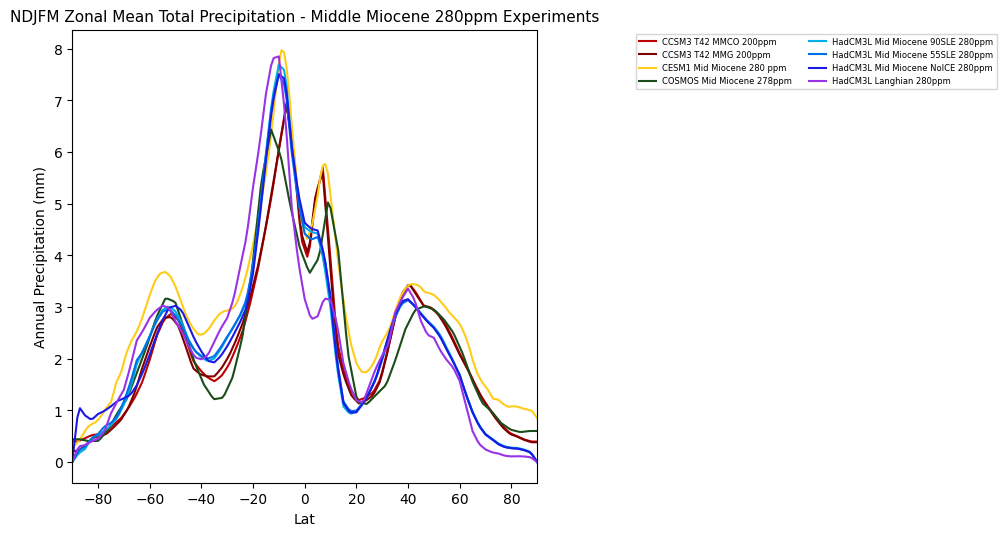

In [29]:
fig = plt.figure(figsize=(6, 6), dpi=100) #figsize(weight,height)

for i in range(0, len(MioStudyName)):
                if i <= 11:
                    plt.plot(lats,prASZM[i][:],linestyle='-',
                            color=(MioStudyR[i],MioStudyG[i],MioStudyB[i]),label=MioStudyName[i])
                
lgd = plt.legend(loc="upper center", bbox_to_anchor=(1.6,1), fancybox=False, shadow=False, ncol=2, fontsize=6)
#text = ax.text(-0.2,1.05, "Aribitrary text", transform=ax.transAxes)

plt.title('NDJFM Zonal Mean Total Precipitation - Middle Miocene 280ppm Experiments', fontsize=11)  
plt.xlabel("Lat")
plt.ylabel("Annual Precipitation (mm)")

#set axis limits
plt.xlim((-90,90))

#plt.errorbar(MIOLat, MIOMAPday,xerr=None,yerr=[MIOMAP-MIOMAPmin, MIOMAPmax-MIOMAP], ls='none', color='pink')
#plt.scatter(MIOLat, MIOMAP, color='pink')
plt.show()

In [11]:
#Spatial plots of Precipitation prANN
# Misc 

MioMIPDIR = "/glade/work/pacosta/tools/scripts/python_bin/MioMIP/Scripts/MioMIP1/"

#Read in updated Herold boundary conditions
filename='miocene_topo_pollard_antscape_dolan_0.5x0.5.nc'
Herold_updated=xr.open_dataset(MioMIPDIR+filename,decode_times=False)

# Grab landmask from SSTs
filename='MioMIP1.nc'
MioMIP1=xr.open_dataset(MioMIPDIR+filename,decode_times=False)

SST_MIO_ALL_EXPS=MioMIP1.SST 
MIO_ALL_landmask1 = np.isnan(SST_MIO_ALL_EXPS)
landmask_MID_MIO_EXPS = MIO_ALL_landmask1[10:]

#convert praANN from DataFrame to DataArray
#prANNary = prANN.to_array()
#prANNary
#type(prANNary)

#prMM = np.mean(prANNary,axis=0)

/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: No contour levels were found within the data range.


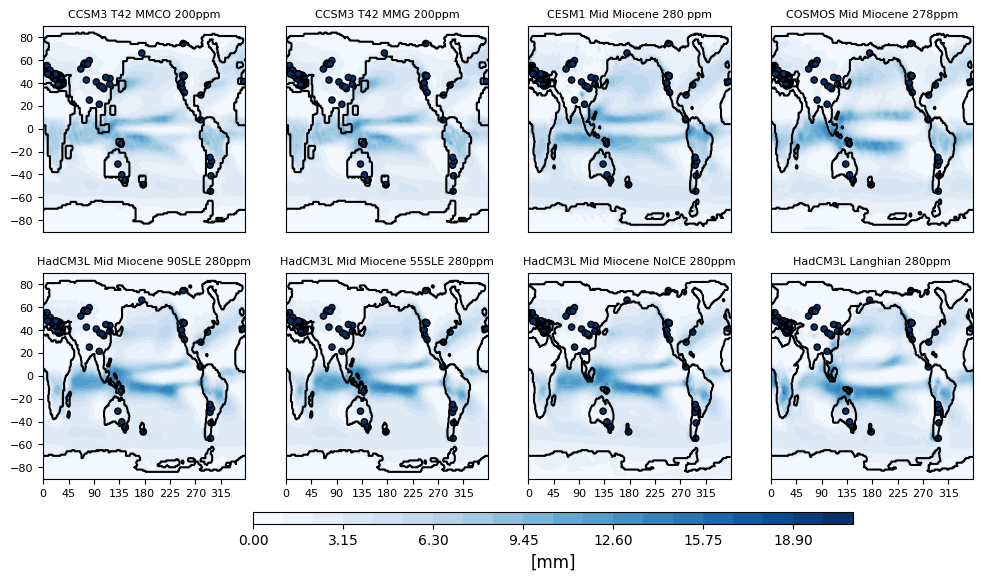

In [12]:
# Start plotting All model output

ncols = 4
nrows = 2
# set contour levels
contour_levels = np.linspace(0,21,21)
contour_levels
norm = mcolors.BoundaryNorm(boundaries=contour_levels, ncolors=256)
#tickmarks
ytick_levels = np.linspace(-80,80,9)
xtick_levels = np.linspace(0,360,9)

fig = plt.figure(figsize=(12, 6), dpi=100) #figsize(weight,height)

for i in range(0, len(MioStudyName)):
    # iterate over all of the Late Miocene Experiments
           #ax = plt.subplot(nrows, ncols, i+1)
            ax = fig.add_subplot(nrows, ncols, i+1)
            cf = plt.contourf(pr0.lon,pr0.lat,prASary[i,:,:], contour_levels, cmap='Blues', extend="both")
            ax.set_title(MioStudyName[i], fontsize=8)
            #ax.contour(Herold_updated.topo.lon,Herold_updated.topo.lat,Herold_updated.topo, levels=[0], colors='k', linestyles='-')
            cf=plt.scatter( MIOLon,MIOLat, c=MIOMAP,marker='o', edgecolors='k', norm=norm, cmap='Blues', s=20)
            
            if i == 5 or i == 6 or i == 7 :
                ax.set_xticks(xtick_levels)
                ax.set_yticks([])
            elif i == 0:
                ax.set_xticks([])
                ax.set_yticks(ytick_levels)   
            elif i == 4:
                ax.set_xticks(xtick_levels)
                ax.set_yticks(ytick_levels)   
            else:
                ax.set_xticks([])
                ax.set_yticks([]) 
            ax.tick_params(axis='both', which='major', labelsize=8)

            MIDMIO_coast=landmask_MID_MIO_EXPS[i,:,:]*1
            #ax.contour(Herold_updated.topo.lon,Herold_updated.topo.lat,Herold_updated.topo, levels=[0], colors='k', linestyles='-')
            ax.contour(pr0.lon,pr0.lat,MIDMIO_coast, levels=[0], colors='k', linestyles='-')
            
# make an axes to put the shared colorbar in
colorbar_axes = plt.gcf().add_axes([0.3, 0.05, 0.5, 0.02])
colorbar = plt.colorbar(cf, colorbar_axes, orientation='horizontal')
colorbar.set_label('%s' % '[mm]',size=12)
#plt.title('NDJFM Zonal Mean Total Precipitation - Middle Miocene 280ppm Experiments', fontsize=11) 

NameError: name 'prMM' is not defined

<Figure size 1200x1800 with 0 Axes>

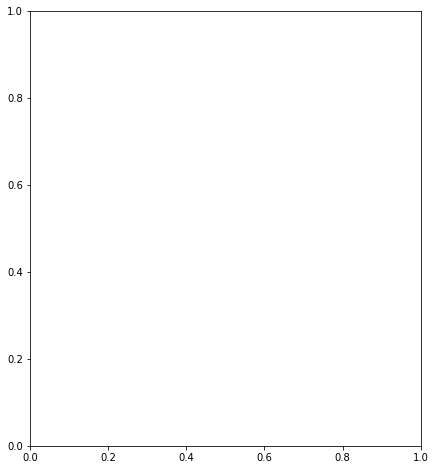

In [13]:
# Start plotting mean model output with proxies

contour_levels = np.linspace(0,3000,21)
contour_levels
norm = mcolors.BoundaryNorm(boundaries=contour_levels, ncolors=256)

fig = plt.figure(figsize=(12, 18), dpi=100) #figsize(weight,height)
fig,ax=plt.subplots(figsize=(7, 8))

cf = plt.contourf(pr0.lon,pr0.lat,prMM[:,:],contour_levels, cmap='Blues', extend="both")
ax.set_title("Ensamble Mean Middle Miocene 280 ppm", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.contour(Herold_updated.topo.lon,Herold_updated.topo.lat,Herold_updated.topo, levels=[0], colors='k', linestyles='-')
cf=plt.scatter( MIOLon,MIOLat, c=MIOMAP,
               vmin=min(contour_levels), vmax=max(contour_levels), marker='o', edgecolors='k', norm=norm, cmap='Blues', s=80)

# make an axes to put the shared colorbar in
colorbar_axes = plt.gcf().add_axes([0.3, 0.04, 0.5, 0.02])
colorbar = plt.colorbar(cf, colorbar_axes, orientation='horizontal')
colorbar.set_label('%s' % '[mm]',size=12)


max(contour_levels)

In [15]:
pr0BS = xr.concat([pr0[4,:,:],pr0[5,:,:],pr0[6,:,:],pr0[7,:,:],pr0[8,:,:]],dim="time")
pr1BS = xr.concat([pr1[4,:,:],pr1[5,:,:],pr1[6,:,:],pr1[7,:,:],pr1[8,:,:]],dim="time")
pr2BS = xr.concat([pr2[4,:,:],pr2[5,:,:],pr2[6,:,:],pr2[7,:,:],pr2[8,:,:]],dim="time")
pr3BS = xr.concat([pr3[4,:,:],pr3[5,:,:],pr3[6,:,:],pr3[7,:,:],pr3[8,:,:]],dim="time")
pr4BS = xr.concat([pr4[4,:,:],pr4[5,:,:],pr4[6,:,:],pr4[7,:,:],pr4[8,:,:]],dim="time")
pr5BS = xr.concat([pr5[4,:,:],pr5[5,:,:],pr5[6,:,:],pr5[7,:,:],pr5[8,:,:]],dim="time")
pr6BS = xr.concat([pr6[4,:,:],pr6[5,:,:],pr6[6,:,:],pr6[7,:,:],pr6[8,:,:]],dim="time")
pr7BS = xr.concat([pr7[4,:,:],pr7[5,:,:],pr7[6,:,:],pr7[7,:,:],pr7[8,:,:]],dim="time")


prBSset0 = xr.Dataset(data_vars=dict(pr0BS=(['time','lat','lon'],pr0BS[:,:,:]),
                                    pr1BS=(['time','lat','lon'],pr1BS[:,:,:]),
                                    pr2BS=(['time','lat','lon'],pr2BS[:,:,:]),
                                    pr3BS=(['time','lat','lon'],pr3BS[:,:,:]),
                                    pr4BS=(['time','lat','lon'],pr4BS[:,:,:]),
                                    pr5BS=(['time','lat','lon'],pr5BS[:,:,:]),
                                    pr6BS=(['time','lat','lon'],pr6BS[:,:,:]),
                                    pr7BS=(['time','lat','lon'],pr7BS[:,:,:]),
                                  ),
                   coords=dict({'lat':lats, 'lon':lons}))
prBSary0 = prBSset0.to_array()
prBSNEW0=prBSary0.rename({'variable': 'exp'})
prBSNEW = prBSNEW0.mean(dim='exp', keep_attrs = True)



pr0BSm = pr0BS.mean(dim='time', keep_attrs = True)
pr1BSm = pr1BS.mean(dim='time', keep_attrs = True)
pr2BSm = pr2BS.mean(dim='time', keep_attrs = True)
pr3BSm = pr3BS.mean(dim='time', keep_attrs = True)
pr4BSm = pr4BS.mean(dim='time', keep_attrs = True)
pr5BSm = pr5BS.mean(dim='time', keep_attrs = True)
pr6BSm = pr6BS.mean(dim='time', keep_attrs = True)
pr7BSm = pr7BS.mean(dim='time', keep_attrs = True)

prBSset = xr.Dataset(data_vars=dict(pr0BS=(['lat','lon'],pr0BSm[:,:]),
                                    pr1BS=(['lat','lon'],pr1BSm[:,:]),
                                    pr2BS=(['lat','lon'],pr2BSm[:,:]),
                                    pr3BS=(['lat','lon'],pr3BSm[:,:]),
                                    pr4BS=(['lat','lon'],pr4BSm[:,:]),
                                    pr5BS=(['lat','lon'],pr5BSm[:,:]),
                                    pr6BS=(['lat','lon'],pr6BSm[:,:]),
                                    pr7BS=(['lat','lon'],pr7BSm[:,:]),
                                  ),
                   coords=dict({'lat':lats, 'lon':lons}))
prBSary = prBSset.to_array()


/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: No contour levels were found within the data range.


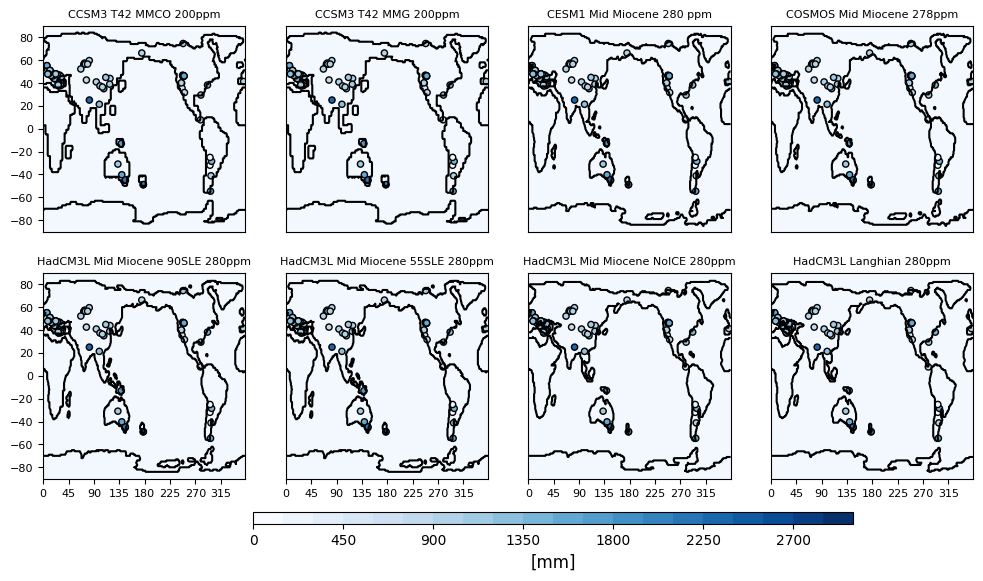

In [16]:
# Start plotting All model output
import matplotlib.colors as mcolors

ncols = 4
nrows = 2
# set contour levels
contour_levels = np.linspace(0,3000,21)
contour_levels
norm = mcolors.BoundaryNorm(boundaries=contour_levels, ncolors=256)
#tickmarks
ytick_levels = np.linspace(-80,80,9)
xtick_levels = np.linspace(0,360,9)

fig = plt.figure(figsize=(12, 6), dpi=100) #figsize(weight,height)

for i in range(0, len(MioStudyName)):
    # iterate over all of the Late Miocene Experiments
           #ax = plt.subplot(nrows, ncols, i+1)
            ax = fig.add_subplot(nrows, ncols, i+1)
            cf = plt.contourf(pr0.lon,pr0.lat,prBSary[i,:,:], contour_levels, cmap='Blues', extend="both")
            ax.set_title(MioStudyName[i], fontsize=8)
            #ax.contour(Herold_updated.topo.lon,Herold_updated.topo.lat,Herold_updated.topo, levels=[0], colors='k', linestyles='-')
            cf=plt.scatter( MIOLon,MIOLat, c=MIOMAP,marker='o', edgecolors='k', norm=norm, cmap='Blues', s=20)
            
            if i == 5 or i == 6 or i == 7 :
                ax.set_xticks(xtick_levels)
                ax.set_yticks([])
            elif i == 0:
                ax.set_xticks([])
                ax.set_yticks(ytick_levels)   
            elif i == 4:
                ax.set_xticks(xtick_levels)
                ax.set_yticks(ytick_levels)   
            else:
                ax.set_xticks([])
                ax.set_yticks([]) 
            ax.tick_params(axis='both', which='major', labelsize=8)

            MIDMIO_coast=landmask_MID_MIO_EXPS[i,:,:]*1
            #ax.contour(Herold_updated.topo.lon,Herold_updated.topo.lat,Herold_updated.topo, levels=[0], colors='k', linestyles='-')
            ax.contour(pr0.lon,pr0.lat,MIDMIO_coast, levels=[0], colors='k', linestyles='-')
            
# make an axes to put the shared colorbar in
colorbar_axes = plt.gcf().add_axes([0.3, 0.05, 0.5, 0.02])
colorbar = plt.colorbar(cf, colorbar_axes, orientation='horizontal')
colorbar.set_label('%s' % '[mm]',size=12)
#plt.title('NDJFM Zonal Mean Total Precipitation - Middle Miocene 280ppm Experiments', fontsize=11) 

In [17]:
prMMBS = np.mean(prBSary, axis=0)
prMMBS

<xarray.DataArray (lat: 181, lon: 360)>
array([[0.1685105 , 0.16850987, 0.16851035, ..., 0.1685105 , 0.1685105 ,
        0.1685105 ],
       [0.19430043, 0.19382216, 0.19333619, ..., 0.20269635, 0.19991007,
        0.19710962],
       [0.21785092, 0.21708597, 0.21631795, ..., 0.23360527, 0.22838834,
        0.22312135],
       ...,
       [0.68157285, 0.6823101 , 0.68297255, ..., 0.6820308 , 0.68195224,
        0.6817997 ],
       [0.53867584, 0.53904855, 0.53937685, ..., 0.5389571 , 0.53890175,
        0.5388109 ],
       [0.39335588, 0.39335588, 0.39335588, ..., 0.39335588, 0.39335588,
        0.39335588]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0

/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  from ipykernel import kernelapp as app


3000.0

<Figure size 1200x1800 with 0 Axes>

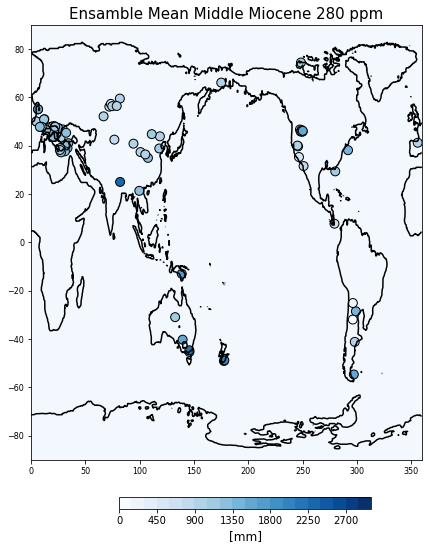

In [18]:
# Start plotting mean model output with proxies

contour_levels = np.linspace(0,3000,21)
contour_levels
norm = mcolors.BoundaryNorm(boundaries=contour_levels, ncolors=256)

fig = plt.figure(figsize=(12, 18), dpi=100) #figsize(weight,height)
fig,ax=plt.subplots(figsize=(7, 8))

cf = plt.contourf(pr0.lon,pr0.lat,prMMBS[:,:],contour_levels, cmap='Blues', extend="both")
ax.set_title("Ensamble Mean Middle Miocene 280 ppm", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.contour(Herold_updated.topo.lon,Herold_updated.topo.lat,Herold_updated.topo, levels=[0], colors='k', linestyles='-')
cf=plt.scatter( MIOLon,MIOLat, c=MIOMAP,
               vmin=min(contour_levels), vmax=max(contour_levels), marker='o', edgecolors='k', norm=norm, cmap='Blues', s=80)

# make an axes to put the shared colorbar in
colorbar_axes = plt.gcf().add_axes([0.3, 0.04, 0.5, 0.02])
colorbar = plt.colorbar(cf, colorbar_axes, orientation='horizontal')
colorbar.set_label('%s' % '[mm]',size=12)


max(contour_levels)

In [19]:
#Create monsoon zones

# Sum months

prBSSUM = prBSNEW.sum(dim='time')
prASSUM = prASNEW.sum(dim='time')
prANSUM = prNEW.sum(dim='time')

#normalized summer values by annual values
prBSNorm = prBSSUM/prANSUM
prASNorm = prASSUM/prANSUM


#Criteria set for 60% 
prBSMASK = xr.where((prBSNorm > .55) & (prBSSUM>3.) ,1,0)
prASMASK = xr.where((prASNorm > .55) & (prASSUM>3.) ,1,0)

#Create mirror image of Hemisphere using where function
prNorm0 = xr.where(prBSNorm.lat<0,prASNorm,prBSNorm)
prMASK0 = xr.where(prBSMASK.lat<0,prASMASK,prBSMASK)

#contour_levels = np.linspace(0,3000,21)
#print(f" min= { prBSSUM.min().data }    max={ prBSSUM.max().data }")


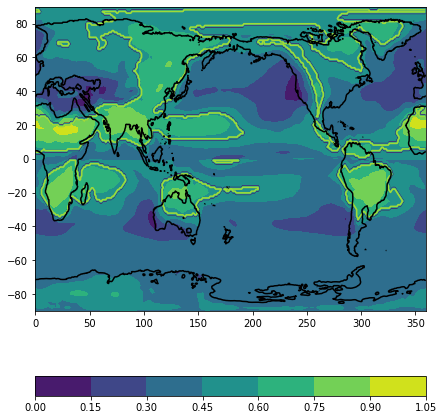

In [20]:
fig,ax=plt.subplots(figsize=(7, 8))

plot = plt.contour(pr0.lon,pr0.lat,prMASK0[:,:])
plot = plt.contourf(pr0.lon,pr0.lat,prNorm0[:,:])
ax.contour(Herold_updated.topo.lon,Herold_updated.topo.lat,Herold_updated.topo, levels=[0], colors='k', linestyles='-')
colorbar = plt.colorbar(plot, orientation='horizontal')

In [21]:
#-- Printout Variables using netcdf4


#-- fileout name --
path = "/glade/work/pacosta/tools/scripts/python_bin/MioMIP/Converted_data/final/season/"
CO2 = "280"
fileout = path + "MMIO"+CO2+"-1deg-Seasonal-Precip-Normalized.nc"

os.system("rm -rf "+fileout) #-- delete file

rootgrp = nc.Dataset(fileout,'w',format='NETCDF4')
# -- Create sudo dimensions --

lat = rootgrp.createDimension('lat', 181)
lon = rootgrp.createDimension('lon', 360)

#-- Vars --
lat = rootgrp.createVariable('lat', 'f4', ('lat',))
lon = rootgrp.createVariable('lon', 'f4', ('lon',))

lat[:]=lats
lon[:]=lons


prMASK = rootgrp.createVariable('prMASK','f4',('lat','lon',))
prMASK.units = 'mm' 
prMASK.long_name = 'Precipitation MASK'
prMASK[:,:] = prMASK0[:,:]

prNorm = rootgrp.createVariable('prNorm','f4',('lat','lon',))
prNorm.units = 'mm' 
prNorm.long_name = 'Precipitation Normalized'
prNorm[:,:] = prNorm0[:,:]


rootgrp.description = "original_script: Seasonal_ZonalMean_PRECT_CO2" 
rootgrp.info = "Created by R.P.Acosta 2022" 

rootgrp.close()

In [20]:
#-- Printout Variables using netcdf4

prBSNEW=prBSary.rename({'variable': 'exp,'})
prASNEW=prASary.rename({'variable': 'exp,'})

#-- fileout name --
path = "/glade/work/pacosta/tools/scripts/python_bin/MioMIP/Converted_data/final/season/"
CO2 = "280"
fileout = path + "MMIO"+CO2+"-1deg-Seasonal-Precip-Spatial.nc"

os.system("rm -rf "+fileout) #-- delete file

rootgrp = nc.Dataset(fileout,'w',format='NETCDF4')
# -- Create sudo dimensions --

exp = rootgrp.createDimension('exp', len(MioStudyName))
lat = rootgrp.createDimension('lat', 181)
lon = rootgrp.createDimension('lon', 360)

#-- Vars --
exp = rootgrp.createVariable('exp', 'U32', ('exp',))
lat = rootgrp.createVariable('lat', 'f4', ('lat',))
lon = rootgrp.createVariable('lon', 'f4', ('lon',))

lat[:]=lats
lon[:]=lons


prBoreal = rootgrp.createVariable('prBoreal','f4',('exp','lat','lon',))
prBoreal.units = 'mm' 
prBoreal.long_name = 'Precipitation Boreal Summer'
prBoreal[:,:,:] = prBSNEW[:,:,:]

prAustral = rootgrp.createVariable('prAustral','f4',('exp','lat','lon',))
prAustral.units = 'mm' 
prAustral.long_name = 'Precipitation Austral Summer'
prAustral[:,:,:] = prASNEW[:,:,:]


rootgrp.description = "original_script: Seasonal_ZonalMean_PRECT_CO2" 
rootgrp.info = "Created by R.P.Acosta 2022" 

rootgrp.close()